In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from predictions import make_prediction, PredMetrics, get_prediction_metrics, labels

2024-11-14 13:57:56.292062: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 13:57:56.339999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 13:57:56.389132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731572876.450051 1279413 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731572876.467314 1279413 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 13:57:56.513490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", 
    mode='max', 
    patience=5, 
    min_delta=0.0001
)

In [38]:
x_train = np.load("../data/preserve100/x_train.npy")
y_train = np.load("../data/preserve100/y_train.npy")
x_test = np.load("../data/preserve100/x_test.npy")
y_test = np.load("../data/preserve100/y_test.npy")

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
x_test_smote, y_test_smote = smote.fit_resample(x_test, y_test)

In [32]:
import pandas as pd

# Before SMOTE
print("Class distribution in original data:")
original_counts = pd.Series(y_train.flatten()).value_counts().sort_index()  # Flatten and sort by index (class label)
print(original_counts)

# After SMOTE
print("Class distribution after applying SMOTE:")
smote_counts = pd.Series(y_train_smote.flatten()).value_counts().sort_index()  # Flatten and sort by index (class label)
print(smote_counts)

Class distribution in original data:
0     1703091
1        1472
2       96207
3        7764
4      172563
5        4181
6        4333
7        5940
8           7
9          29
10     119238
11       4445
12       1130
13         17
14        490
Name: count, dtype: int64
Class distribution after applying SMOTE:
0     1703091
1     1703091
2     1703091
3     1703091
4     1703091
5     1703091
6     1703091
7     1703091
8     1703091
9     1703091
10    1703091
11    1703091
12    1703091
13    1703091
14    1703091
Name: count, dtype: int64


In [33]:
x_train=x_train_smote
y_train=y_train_smote
x_test=x_test_smote
y_test=y_test_smote

In [34]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (25546365, 31)
y_train (25546365,)
x_test (8523435, 31)
y_test (8523435,)


In [39]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [7]:
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(shape=(31,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(15, activation="softmax")
])

2024-11-14 13:59:56.862637: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.compile(optimizer="adamax",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
model.fit(x_train,
          y_train,
          epochs=10,
          callbacks=[earlystop_callback],
          batch_size=128
         )

Epoch 1/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 643s 3ms/step - accuracy: 0.8836 - loss: 0.2549
Epoch 2/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 641s 3ms/step - accuracy: 0.9171 - loss: 0.1625
Epoch 3/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 641s 3ms/step - accuracy: 0.9191 - loss: 0.1579
Epoch 4/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 647s 3ms/step - accuracy: 0.9206 - loss: 0.1557
Epoch 5/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 647s 3ms/step - accuracy: 0.9207 - loss: 0.1548
Epoch 6/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 642s 3ms/step - accuracy: 0.9221 - loss: 0.1536
Epoch 7/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 642s 3ms/step - accuracy: 0.9228 - loss: 0.1532
Epoch 8/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 646s 3ms/step - accuracy: 0.9241 - loss: 0.1523
Epoch 9/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 649s 3ms/step - accuracy: 0.9245 - loss: 0.1518
Epoch 10/10
199581/199581 ━━━━━━━━━━━━━━━━━━━━ 650s 3ms/step - accuracy: 0.9246 - loss: 0.1515


In [10]:
print("Train Accuracy")
model.evaluate(x_train, 
               y_train, 
               verbose=2)

Train Accuracy
798324/798324 - 803s - 1ms/step - accuracy: 0.9291 - loss: 0.1420


[0.1419743299484253, 0.929103672504425]

In [40]:
print("Test Accuracy")
model.evaluate(x_test, 
               y_test_onehot, 
               verbose=2)

Test Accuracy
22093/22093 - 23s - 1ms/step - accuracy: 0.9714 - loss: 0.0911


[0.0911460667848587, 0.97141033411026]

In [12]:
print("Train Model Detailed Report")
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
predictions_train = make_prediction(model, x_train, y_train)
pred_metrics_train = get_prediction_metrics(predictions_train)


print("FP Rate (FPR):", round(pred_metrics_train.weighted_fpr, 4))
print("FN Rate (FNR):", round(pred_metrics_train.weighted_fnr, 4))
print("Detection Rate:", round(pred_metrics_train.weighted_detection_rate, 4))
print("False Alarm Rate (FAR):", round(pred_metrics_train.false_alarm_rate, 4))
print("Accuracy: ", round(pred_metrics_train.classification_report.loc["accuracy"].iloc[0], 4))

pred_metrics_train.classification_report.columns = ["Precision", "Recall", "F1-score", "Quantity"]
pred_metrics_train.classification_report = pred_metrics_train.classification_report.astype({"Quantity": int})
pred_metrics_train.classification_report.drop("accuracy", axis=0, inplace=True)

print("\n", pred_metrics_train.classification_report)

Train Model Detailed Report
798324/798324 ━━━━━━━━━━━━━━━━━━━━ 854s 1ms/step
FP Rate (FPR): 0.8999
FN Rate (FNR): 0.9994
Detection Rate: 0.0006
False Alarm Rate (FAR): 0.9497
Accuracy:  0.0006

                           Precision    Recall  F1-score  Quantity
BENIGN                     0.001189  0.000082  0.000153  23843274
Bot                        0.007998  0.008059  0.008029   1703091
DDoS                       0.000000  0.000000  0.000000         0
DoS_GoldenEye              0.000000  0.000000  0.000000         0
DoS_Hulk                   0.000000  0.000000  0.000000         0
DoS_Slowhttptest           0.000000  0.000000  0.000000         0
DoS_slowloris              0.000000  0.000000  0.000000         0
FTPPatator                 0.000000  0.000000  0.000000         0
Heartbleed                 0.000000  0.000000  0.000000         0
Infiltration               0.000000  0.000000  0.000000         0
PortScan                   0.000000  0.000000  0.000000         0
SSHPatator   

In [41]:
print("Test Model Detailed Report")
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
predictions = make_prediction(model, x_test, y_test)
pred_metrics = get_prediction_metrics(predictions)


print("FP Rate (FPR):", round(pred_metrics.weighted_fpr, 4))
print("FN Rate (FNR):", round(pred_metrics.weighted_fnr, 4))
print("Detection Rate:", round(pred_metrics.weighted_detection_rate, 4))
print("False Alarm Rate (FAR):", round(pred_metrics.false_alarm_rate, 4))
print("Accuracy: ", round(pred_metrics.classification_report.loc["accuracy"].iloc[0], 4))

pred_metrics.classification_report.columns = ["Precision", "Recall", "F1-score", "Quantity"]
pred_metrics.classification_report = pred_metrics.classification_report.astype({"Quantity": int})
pred_metrics.classification_report.drop("accuracy", axis=0, inplace=True)

print("\n", pred_metrics.classification_report)

Test Model Detailed Report
22093/22093 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
FP Rate (FPR): 0.0041
FN Rate (FNR): 0.0286
Detection Rate: 0.9714
False Alarm Rate (FAR): 0.0163
Accuracy:  0.9714

                           Precision    Recall  F1-score  Quantity
BENIGN                     0.999099  0.965558  0.982042    568229
Bot                        0.101510  1.000000  0.184311       484
DDoS                       0.958366  0.999811  0.978650     31818
DoS_GoldenEye              0.874697  0.999209  0.932817      2529
DoS_Hulk                   0.941483  0.999253  0.969508     57561
DoS_Slowhttptest           0.828989  0.989378  0.902110      1318
DoS_slowloris              0.925784  0.989064  0.956378      1463
FTPPatator                 0.760886  0.998496  0.863646      1995
Heartbleed                 0.800000  1.000000  0.888889         4
Infiltration               0.053191  0.714286  0.099010         7
PortScan                   0.830603  0.999469  0.907245     39566
SSHPatator       

5524/5524 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9714 - loss: 0.0910
Test Accuracy: 0.9714
22093/22093 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


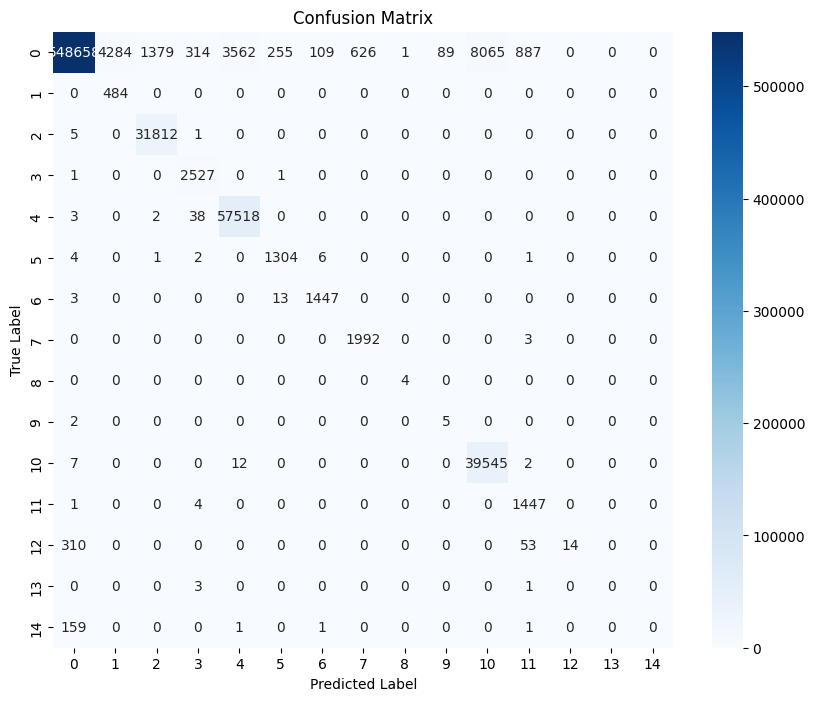

In [42]:
# Evaluate the model on the test data (you can also use x_train and y_train to evaluate training accuracy)
loss, accuracy = model.evaluate(x_test, y_test_onehot, batch_size=128)
print(f"Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


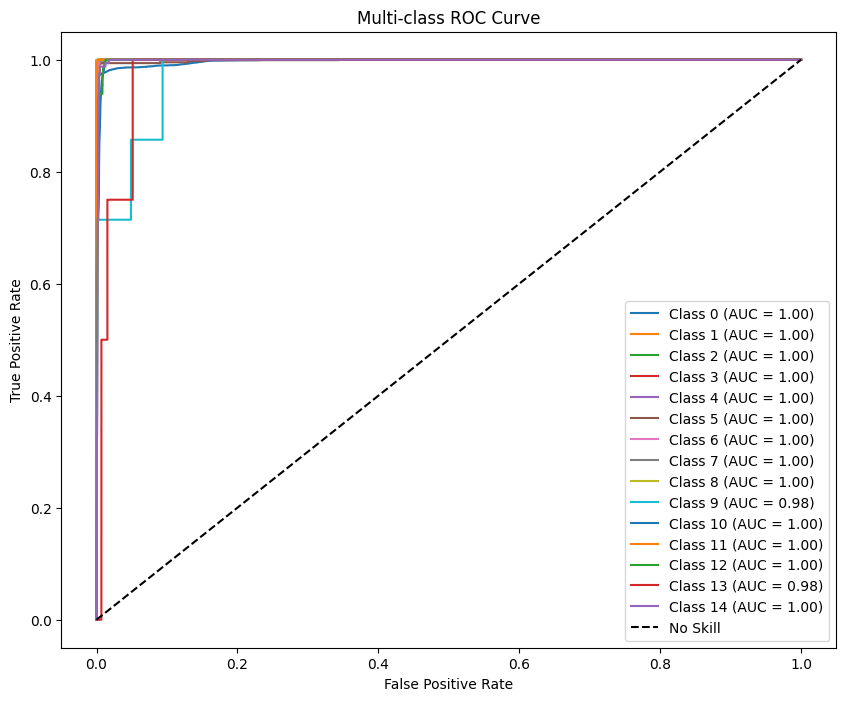

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
num_classes =15
# Assuming `num_classes` is the total number of classes
# Binarize the output for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Step 1: Get predicted probabilities from the classifier
y_pred_prob = model.predict(x_test)  # Probabilities for each class

y_test_binarized = np.nan_to_num(y_test_binarized, nan=0)
y_pred_prob = np.nan_to_num(y_pred_prob, nan=0)

# Step 2: Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Finalize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="best")
plt.show()

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


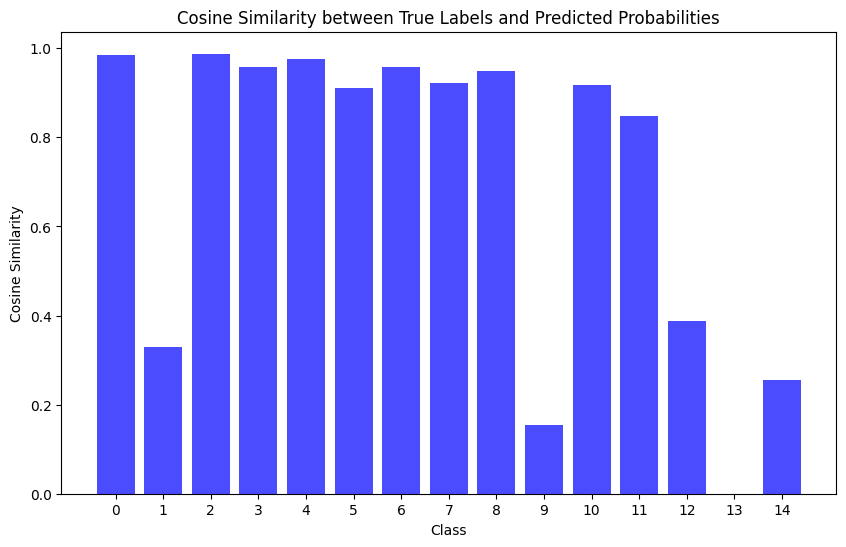

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming `num_classes` is the total number of classes
# Binarize the output for multi-class ROC
num_classes =15
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Step 1: Get predicted probabilities from the classifier
y_pred_prob = model.predict(x_test)  # Probabilities for each class

# Ensure no NaN values in the datasets
y_test_binarized = np.nan_to_num(y_test_binarized, nan=0)
y_pred_prob = np.nan_to_num(y_pred_prob, nan=0)

# Step 2: Compute Cosine Similarity between predicted probabilities and actual labels
cosine_similarities = []

for i in range(num_classes):
    similarity = cosine_similarity([y_test_binarized[:, i]], [y_pred_prob[:, i]])[0][0]
    cosine_similarities.append(similarity)


# Step 4: Plot the Cosine Similarity for each class
plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), cosine_similarities, color='b', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between True Labels and Predicted Probabilities')
plt.xticks(range(num_classes))
plt.show()

Epoch 1/10
13256/13256 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9809 - loss: 0.0503 - val_accuracy: 0.9860 - val_loss: 0.0357
Epoch 2/10
13256/13256 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9827 - loss: 0.0441 - val_accuracy: 0.9854 - val_loss: 0.0358
Epoch 3/10
13256/13256 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9828 - loss: 0.0434 - val_accuracy: 0.9852 - val_loss: 0.0365
Epoch 4/10
13256/13256 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9829 - loss: 0.0432 - val_accuracy: 0.9860 - val_loss: 0.0345
Epoch 5/10
13256/13256 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9832 - loss: 0.0424 - val_accuracy: 0.9863 - val_loss: 0.0345


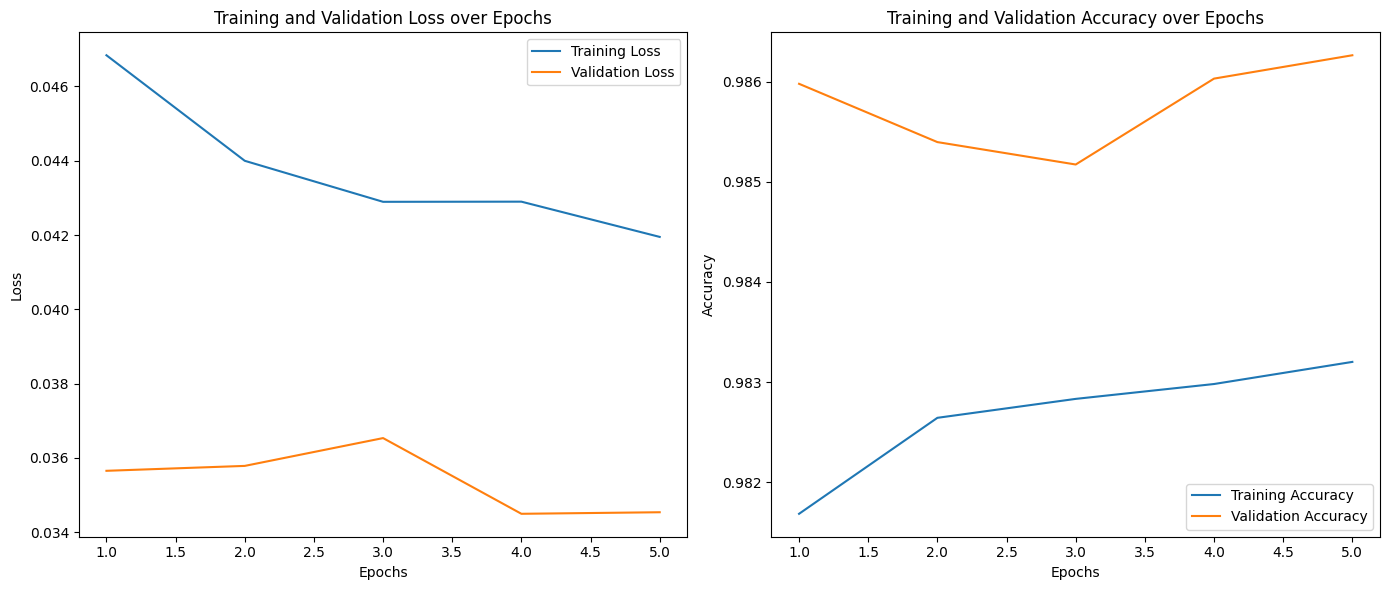

In [45]:
# Train the model and capture the training history
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    callbacks=[earlystop_callback],
    batch_size=128,
    validation_split=0.2  # Optional: to see validation performance
)

# Extract loss and accuracy for both training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting Loss and Accuracy
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
print("Train Model Detailed Report")
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
predictions_train = make_prediction(model, x_train, y_train)
pred_metrics_train = get_prediction_metrics(predictions_train)


print("FP Rate (FPR):", round(pred_metrics_train.weighted_fpr, 4))
print("FN Rate (FNR):", round(pred_metrics_train.weighted_fnr, 4))
print("Detection Rate:", round(pred_metrics_train.weighted_detection_rate, 4))
print("False Alarm Rate (FAR):", round(pred_metrics_train.false_alarm_rate, 4))
print("Accuracy: ", round(pred_metrics_train.classification_report.loc["accuracy"].iloc[0], 4))

pred_metrics_train.classification_report.columns = ["Precision", "Recall", "F1-score", "Quantity"]
pred_metrics_train.classification_report = pred_metrics_train.classification_report.astype({"Quantity": int})
pred_metrics_train.classification_report.drop("accuracy", axis=0, inplace=True)

print("\n", pred_metrics_train.classification_report)

Train Model Detailed Report
798324/798324 ━━━━━━━━━━━━━━━━━━━━ 861s 1ms/step
FP Rate (FPR): 0.0144
FN Rate (FNR): 0.2013
Detection Rate: 0.7987
False Alarm Rate (FAR): 0.1079
Accuracy:  0.7987

                           Precision    Recall  F1-score  Quantity
BENIGN                     0.306702  0.965615  0.465539   1703091
Bot                        0.992673  0.999460  0.996055   1703091
DDoS                       0.997601  0.999688  0.998643   1703091
DoS_GoldenEye              0.828179  0.998727  0.905492   1703091
DoS_Hulk                   0.991456  0.999300  0.995363   1703091
DoS_Slowhttptest           0.995882  0.995380  0.995631   1703091
DoS_slowloris              0.994292  0.995204  0.994748   1703091
FTPPatator                 0.998859  0.999426  0.999142   1703091
Heartbleed                 0.999996  1.000000  0.999998   1703091
Infiltration               0.999738  0.998734  0.999236   1703091
PortScan                   0.982556  0.999501  0.990956   1703091
SSHPatator   